필요 모듈 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 10000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

# pandas 결과값의 표현 범위 소수점 2자리수로 변경
pd.options.display.float_format = "{:.2f}".format

# 파일 로드위한 directory 확인 및 현재 경로로 설정
a = os.getcwd()
os.chdir(a)

# 1. 데이터 로드 및 살펴보기

In [2]:
# 데이터 로드
df = pd.read_csv("funda_train.csv")

## train data살펴보기

In [3]:
# train data 살펴보기
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB
None
        store_id    card_id  installment_term      amount
count 6556613.00 6556613.00        6556613.00  6556613.00
mean     1084.93 2268127.02              0.14    10435.11
std       615.22 1351057.85              1.19    31040.31
min         0.00       0.00              0.00 -2771428.57
25%       586.00 1088828.00              0.00     2142.86
50%      1074.00 2239304.00              0.00     4285.71
75%      1615.00 3438488.00              0.00     8571.43
max      2136.

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.14
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.14
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.00
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.14
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.00


In [4]:
df.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

## submission 데이터 살펴보기

In [6]:
submission_df = pd.read_csv("submission.csv")
print(submission_df.info())
submission_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   store_id  1967 non-null   int64
 1   amount    1967 non-null   int64
dtypes: int64(2)
memory usage: 30.9 KB
None


,store_id,amount
0,0,0
1,1,0
2,2,0
3,4,0
4,5,0


In [7]:
submission_df.isnull().sum()

store_id    0
amount      0
dtype: int64

In [8]:
submission_df['amount'].unique()

array([0], dtype=int64)

제출 파일인 submission_df의 amount가 모두 0인 것으로 보아, 예측한 결과값을 amount에 추가해야 할 것으로 보인다.

# 2. EDA

## store_id

In [9]:
print(df['store_id'].unique())
print(submission_df['store_id'].unique())

[   0    1    2 ... 2134 2135 2136]
[   0    1    2 ... 2134 2135 2136]


In [10]:
print(len(df['store_id']))
print(len(submission_df['store_id']))

6556613
1967


- train의 store_id는 transcate_date 별 매출 (동일 매장에서 중복 매출 발생) 하여 수가 더 많음
- 두 데이터 set의 unique() 값은 일치 -> 최종적으로 train 데이터를 통해 '매장 별 3개월간 총 매출' 형식으로 prediction 을 만들어야 함

## card_id

In [11]:
df['card_id'].unique()

array([      0,       1,       2, ..., 4663854, 4663855, 4663856],
      dtype=int64)

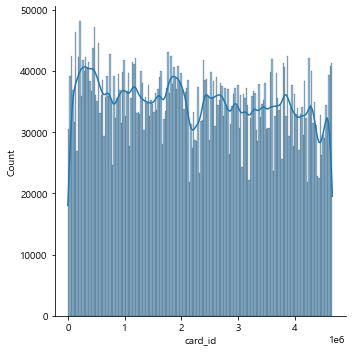

In [12]:
sns.displot(x = df['card_id'], kde=True)
plt.show()

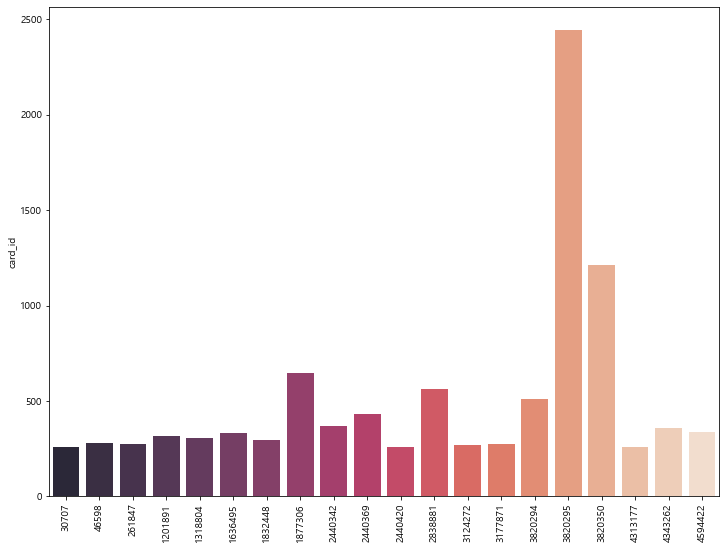

In [13]:
# 데이터 범주가 너무 넓어서 상위 20개 분포만 재확인
card_id = df['card_id'].value_counts()[:20].index
counts = df['card_id'].value_counts()[:20]

bar_plot = sns.barplot(x=card_id, y=counts, alpha=0.9, palette='rocket')
plt.xticks(rotation=90)
plt.show()

- 전체 6556613 개의 데이터 중 겹치지 않는 자료가 4663856개
- card_id는 한 고객이 여러개의 카드를 가질 가능성도 있고, 특정 카드를 사용할때 매출과 직접적으로 연관을 지을 수 있는 별도의 feature가 없음 
- 만약, 카드별 할인율이나 , 프모로션 제도 등에 대한 feature가 있다면 활용이 가능할 수 도 있음.
- 현재로선 예측 결과에 직접적인 영향을 주긴 어려운 feature일 것이라 판단됨.
- drop 하는 것이 바람직해 보인다.

## card_company

In [14]:
df['card_company'].unique()

array(['b', 'h', 'c', 'a', 'f', 'e', 'g', 'd'], dtype=object)

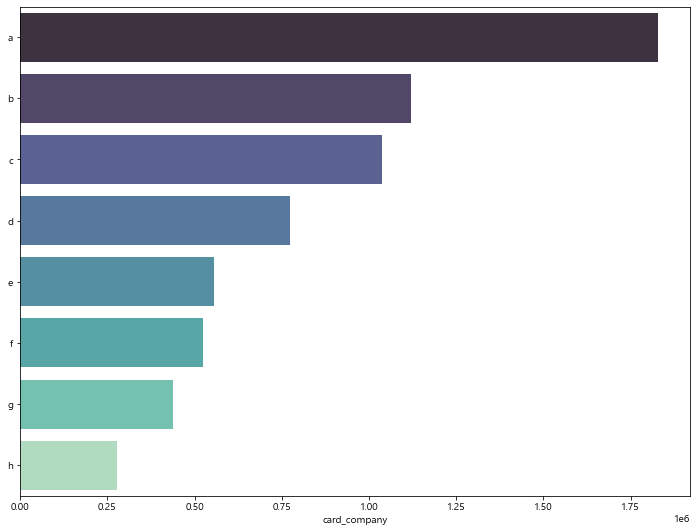

In [15]:
x = df['card_company'].value_counts().index
y = df['card_company'].value_counts()
sns.barplot(x=y, y=x, alpha=0.9, palette='mako');

- 비식별화된 카드회사 정보인데, 알파벳 순 = value_counts()가 일치 
    - 너무 짜여진 데이터 같음 => 모델이 잘못된 방식으로 데이터 인지할 가능성 우려
- 추가적으로, card_id 와 동일한 이유로 활용하기도 어려움
- drop 하는 것이 바람직해 보인다.

## transcated_date

In [16]:
print(df['transacted_date'])
pd.DataFrame(df['transacted_date']).isnull().sum() #결측치 확인

0          2016-06-01
1          2016-06-01
2          2016-06-01
3          2016-06-01
4          2016-06-02
              ...    
6556608    2019-02-28
6556609    2019-02-28
6556610    2019-02-28
6556611    2019-02-28
6556612    2019-02-28
Name: transacted_date, Length: 6556613, dtype: object


transacted_date    0
dtype: int64

- df의 시간 범위: 2016-06-01 ~ 2019-02-28
- 예측에 활용할 주요 feature
- 예측은 매장 별 3개월 총 매출이므로 **'일 단위'** 를 **'월 단위'** 데이터로 통합해야 함

## installment_term

In [17]:
df['installment_term'].value_counts(sort=True)

0     6327632
3      134709
2       42101
5       23751
6       10792
10       6241
4        4816
12       2699
60       1290
7         553
8         413
24        404
9         349
18        332
15        130
20        116
80         83
11         47
30         43
36         36
16         23
14         12
63          8
83          6
65          6
19          4
72          4
13          3
93          2
23          2
35          2
82          2
22          1
17          1
Name: installment_term, dtype: int64

In [18]:
#결측치 확인
pd.DataFrame(df['installment_term'].value_counts()).isnull().sum()

installment_term    0
dtype: int64

- 전체 6556613 개의 데이터 중 일시불인 경우가 6327632 로 대부분이다.
- 대부분이 일시불 값이므로 할부 T/F로 이진화 하여 feature로 사용하는 것이 더 유용할 것이다.

In [20]:
# 시각화 위해 데이터 이진화
df['installment_term2'] = (df['installment_term'] > 0).astype(int) # bool to int (True=1, False=0)
installment = df['installment_term2'].value_counts() 
installment = list(installment)

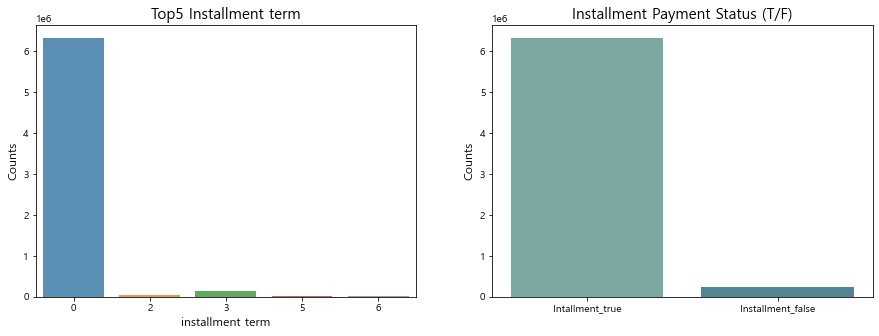

In [21]:
# canvas 크기 설정
plt.figure(figsize=(15,5))


# 그래프1
plt.subplot(121)

# 데이터 추출
count_installment_terms = df['installment_term'].value_counts(sort=True)
count_installment_terms = count_installment_terms[:5,]

# 그래프 1 시각화
sns.barplot(count_installment_terms.index, count_installment_terms.values, alpha=0.8)
plt.title('Top5 Installment term', fontsize = 15)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('installment term', fontsize=12)


# 그래프2
plt.subplot(122)
x = ['Intallment_true', 'Installment_false']
y = installment

# 그래프2 시각화
sns.barplot(x, y, alpha=0.8, palette='crest')
plt.ylabel('Counts', fontsize=12)
plt.title('Installment Payment Status (T/F)', fontsize=15)

plt.show()

## type_of_business

In [22]:
print((df['type_of_business'].value_counts())) #데이터 분포 확인
pd.DataFrame(df['type_of_business'].value_counts()).isnull().sum() #결측치 확인

한식 음식점업                     745905
두발 미용업                      178475
의복 소매업                      158234
기타 주점업                      102413
치킨 전문점                       89277
                             ...  
곡물 및 기타 식량작물 재배업               569
주방용품 및 가정용 유리, 요업 제품 소매업       551
배전반 및 전기 자동제어반 제조업             533
그 외 기타 생활용품 도매업                519
신선식품 및 단순 가공식품 도매업             231
Name: type_of_business, Length: 145, dtype: int64


type_of_business    0
dtype: int64

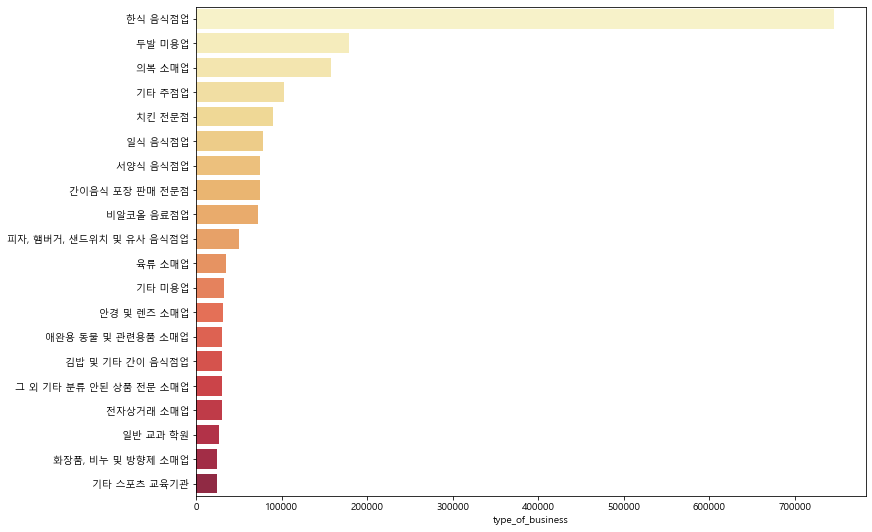

In [23]:
# 종류가 너무 많아 상위 20개만 확인
x = df['type_of_business'].value_counts()[:20].index
y = df['type_of_business'].value_counts()[:20]
sns.barplot(x=y, y=x, alpha=0.9, palette='YlOrRd');

In [24]:
- 범주형 변수
- 업종 종류가 너무 다양해서 type of business raw 데이터로는 예측을 위한 특징으로 사용하기는 어려울 것으로 판단된다.
- 그렇다고 dummy화 하기에는 수가 너무 많음
- store_id와는 명확하게 매칭이 되는 데이터 -> transacted_date 기준으로 분류하면 사용이 가능 할 듯.

SyntaxError: invalid syntax (<ipython-input-24-362993e38f3d>, line 1)

## region

In [25]:
df['region'].value_counts().head()

경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
Name: region, dtype: int64

In [26]:
pd.DataFrame(df['region']).describe()

,region
count,4513847
unique,180
top,경기 수원시
freq,122029


In [27]:
# 결측치 확인
pd.DataFrame(df['region']).isnull().sum()

region    2042766
dtype: int64

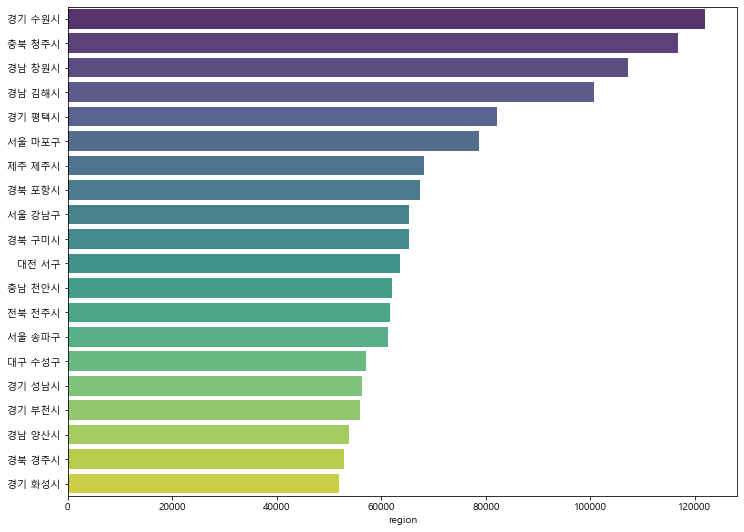

In [28]:
# 지역이 너무 많아 상위 20개만 확인
x = df['region'].value_counts()[:20].index
y = df['region'].value_counts()[:20]
sns.barplot(x=y, y=x, alpha=0.9, palette='viridis');

- 범주형 변수
- type of business 와 마찬가지로 지역의 unique value가 너무 많음 -> raw 데이터로는 예측을 위한 특징 으로 사용하기에 부적합
- region별 매출 특성을 파악 하는 것에는 사용이 가능할 듯.

## EDA 결과 정리

- store_id : 각 상점을 구분지을 중요 feature. 변형없이 사용
- card_id, card_company : 매장 별 매출액 분석에 유의미 하지 않으므로 drop (도메인지식 기반 판단)
- intallment_term : 일시불(0)인 데이터가 압도적으로 많음 -> 일시불 / 할부 로 데이터 이원화 하는 것이 유용
- type_of_business , region : 범주형 데이터, 다만 range가 너무 커서 dummy할 수는 없음. 시간 & store 기준으로 데이터를 병합하면 매출 특성을 구분하는데 사용할 수 있을 것으로 예상됨
- transcade_time : 예측해야할 값은 '월 단위'. 특정 시간대의 매출 경향성이 전체 월 매출에 영향을 끼치지 않을 것이라 판단 
    - 추가로 transcade_date 와 중복되는 경향이 있어 배제
---
- transcade_date : '일' 단위 데이터 -> '월 단위' 로 변경 필요 : group by의 기준이 되는 데이터가 되어야 함 (분석의 key value)
    - standard_t(기준 월) 을 기준으로 매출 합계를 예측 해야 함
    
    - standard_t-2, standard_t-1, standard_t 3개의 데이터 기반 -> standard_t+1, standard_t+2, standard_t+3 을 예측 하는 방식
    
    - e.g) 2016년 1월 , 2016년 2월, 2016년 3월 매출 데이터 기반 -> 2016년 4월 매출, 2016년 5월 매출, 2016년 6월 매출을 예측하는 식으로 반복 학습 방식으로 3년치 데이터 기반으로 최종적으로 2019년 3월 ~ 5월 매출 예측 (중첩된 예측과 검증으로 예측력 상승을 기대)
    
    - 연도 & 월 로 하는 경우 데이터 구분이 명확하지 않을 가능성 있음. 특정 시점을 기준으로 Index 식으로 구분하는 것이 더 모델이 인지를 잘 할 것으로 예상